In [2]:
import pandas as pd #biblioteca para tratar dados em formato de dataframe
import seaborn as sns #biblioteca para deixar mais bonito os gráficos
import numpy as np #biblioteca para trabalhar com matrizes e vetores
import matplotlib.pyplot as plt #biblioteca para construir gráficos como matlab
from google.colab import files #importar arquivos do PC

In [3]:
upload_arq = files.upload() #aqui estou chamando o arquivo do dataset

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [4]:
#agora que já realizei o upload dos meus dados eu preciso dar nome ao dataset e
#fazer o panda reconhecer o dataset
nomeArq = "comp_bikes_mod.csv"
dataset = pd.read_csv(nomeArq, sep = ',') #aqui estou realizando a leitura

Agora que realizei a importação do que eu lembro :/, 
e também tenho o dataset, preciso conhece-lo


In [5]:
dataset.head() #aqui estou apresentando as primeiras 5 linhas do dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [6]:
#Como pode-se verificar, temos algumas colunas que possuem valores nulos
#Vamos conhecer agora as informações do nosso dataset
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


(17379, 17)

Podemos ver que há 17379 linhas e 17 colunas, porém temos 15641 linhas de valores não nulos, logo, são muitos valores e como pedido vamos apagar os valores nulos de dteday 

In [7]:
#Agora vamos acessar os dias com valores nulos e apaga-los
dataset.dropna(subset=['dteday'], inplace = True)

In [8]:
#Agora que retirei como foi pedido, os valores nulos da coluna dteday, vamos verficar como está nosso dataset
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


(15641, 17)

In [9]:
#agora vamos verificar a média da coluna temp e outras informações com describe
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
#Agora vamos categorizar os valores da coluna season
dataset['season'] = pd.get_dummies(dataset['season'])
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


In [11]:
#agora ou passar a coluna dteday para datatime
dataset['dteday'] = pd.to_datetime(dataset['dteday'])
dataset.loc[17378]

instant                       NaN
dteday        2012-12-31 00:00:00
season                          0
yr                              1
mnth                          NaN
hr                             23
holiday                         0
weekday                         1
workingday                      1
weathersit                      1
temp                          NaN
atemp                      0.2727
hum                          0.65
windspeed                  0.1343
casual                         12
registered                     37
cnt                            49
Name: 17378, dtype: object

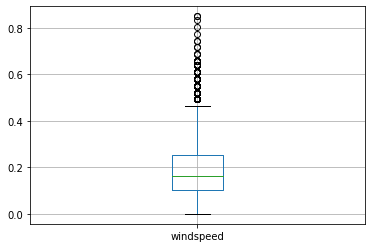

In [12]:
#Agora vamos plotar o boxplot de windspeed para verificar possíveis outlier
dataset.boxplot(['windspeed'])

In [13]:
#Agora vamos plotar a matrix de correlação para 'hum' e 'cnt' e selecionar as variáveis pedidas
dataset[['season', 'temp', 'atemp', 'hum', 'windspeed']]
dataset[['hum', 'cnt']].corr() #aqui estamos plotando a matrix de correlação que é possível verificar que as variáveis tem
#correlação linear negativa
#Use a matriz de correlação para avaliar a força e a direção da relação entre dois itens ou variáveis
#Valores de correlação altos e positivos indicam que os itens medem a mesma habilidade ou
#característica. Se os itens não estão altamente correlacionados, os itens podem medir diferentes
#características ou podem não estar claramente definidos.

,hum,cnt
hum,1.000000,-0.323409
cnt,-0.323409,1.000000


In [14]:
#Após isso, vamos agora substituir os valores nulos em 'hum', 'cnt' e 'casual'
dataset['casual'].fillna(dataset['casual'].mean(), inplace = True)
dataset['hum'].fillna(dataset['hum'].mean(), inplace = True)
dataset['cnt'].fillna(dataset['cnt'].mean(), inplace = True)

In [15]:
#Agora vamo definir os vetores que serão usados na regressão
Xdata = np.array(dataset[['casual', 'hum']]) #aqui como é visível, tenho que transformar os dados em arrays para poder trabalhar
#mesmo que tenha duas variáveis, eu posso misturar tudo aqui
Ydata = np.array(dataset[['cnt']])

In [18]:
#Aqui estou importando as bibliotecas que irei utilizar para fazer a regressão
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
#Aqui estou realizando a preparação para a regressão e a realizando
dataset_regressao = LinearRegression()
regressao = dataset_regressao.fit(Xdata, Ydata) #encontra os coeficiente (realiza a regressão)

In [20]:
#Agora vamos realizar a previsão dos dados e apresentando-os
predicao_linear = regressao.predict(Xdata)
print('Y = {} e X = {}'.format(regressao.coef_, regressao.intercept_))

Y = [[  2.21512197 -99.75012328]] e X = [173.29337505]


In [ ]:
#Agora vamos achar o R² para esta regressão
R2Reg = r2_score (Ydata, predicao_linear)
print('R² = {}'.format(R2Reg))

R² = 0.4059859251122173


In [ ]:
#Depois desse caso com a regressão linear, vamos fazer para a arvore de decisão
from sklearn.tree import DecisionTreeRegressor
regressaoTree = DecisionTreeRegressor()

In [ ]:
#Como pode ver a importação é extremamente similar e o passo a passo também
regressaoTree.fit(Xdata, Ydata)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Agora que montamos os dados, vamos realizar a predição
predicao_linear_tree = regressaoTree.predict(Xdata)

In [ ]:
#Agora vamos calcular o R² para este caso também
R2Tree = r2_score(Ydata, predicao_linear_tree)
print('R² = {}'.format(R2Tree))

R² = 0.7098339715834964


In [ ]:
#Como pode-se verificar a árvore de decisão faz uma previsão mais assertiva do que a regressão

In [ ]:
#Agora vamos importa o modelo de Support Vector Regression para comparar com os outros modelos
from sklearn.svm import SVR

In [ ]:
#Aqui estou realizando a Regressão pelo modelo SVR
regressaoVector = SVR()
regressaoVector.fit(Xdata, Ydata)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Agora vamos fazer a predição e achar o R² para este modelo também
predicao_vector = regressaoVector.predict(Xdata)
R2Vec = r2_score(Ydata, predicao_vector)
print('R² = {}'.format(R2Vec))

R² = 0.4017994745187701
